In [85]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [86]:
# Load the sales dataset
sales_data = pd.read_csv('sales_dataset.csv')

In [87]:
# Make a copy of dataset for analysis
sales_data2 = sales_data.copy()

## Exploratory Analysis

In [88]:
# Viewing the Data
sales_data2.head()

,order_date,order_number,customer_id,customer_name,zipcode,city,state_id,state_name,product_code,product_name,category,unit_price,unit_profit,quantity,revenue,profit,discount_percentage,discount_amount,lead_time_weeks
0,2019-11-13,Ord-3255406,cust-00004673,Ariana Nixon,32162,The Villages,FL,Florida,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,3,78.77,27.57,0.0,0.0,2
1,2016-04-06,Ord-6058810,cust-00038703,Mohammad Esparza,80123,Littleton,CO,Colorado,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,1,26.26,9.19,0.0,0.0,2
2,2019-08-15,Ord-1857958,cust-00106675,Jada Porter,55433,Minneapolis,MN,Minnesota,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,4,105.02,36.76,0.0,0.0,2
3,2019-10-01,Ord-8598538,cust-00188381,Ari Mcgrath,36201,Anniston,AL,Alabama,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,3,78.77,27.57,0.0,0.0,2
4,2016-07-24,Ord-3416282,cust-00213804,Kaitlynn Watkins,46143,Greenwood,IN,Indiana,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,4,105.02,36.76,0.0,0.0,2


In [89]:
# Checking datatypes of each column
sales_data2.dtypes

order_date              object
order_number            object
customer_id             object
customer_name           object
zipcode                  int64
city                    object
state_id                object
state_name              object
product_code            object
product_name            object
category                object
unit_price             float64
unit_profit            float64
quantity                 int64
revenue                float64
profit                 float64
discount_percentage    float64
discount_amount        float64
lead_time_weeks          int64
dtype: object

In [90]:
# Summary Statistics of the data
sales_data2.describe()

,zipcode,unit_price,unit_profit,quantity,revenue,profit,discount_percentage,discount_amount,lead_time_weeks
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,52900.644142,30.881986,12.177759,2.494700,75.143118,28.488434,0.024401,1.888474,1.891317
std,30931.138697,7.629023,3.554572,1.117407,39.631622,16.538022,0.058018,5.170910,1.287887
min,602.000000,11.920000,4.170000,1.000000,9.530000,1.790000,0.000000,0.000000,0.000000
25%,27910.000000,26.440000,9.770000,1.000000,38.360000,14.790000,0.000000,0.000000,1.000000
50%,49301.000000,30.970000,11.900000,2.000000,71.420000,25.490000,0.000000,0.000000,2.000000
75%,83445.000000,36.340000,14.920000,3.000000,104.720000,38.660000,0.000000,0.000000,3.000000
max,99801.000000,47.490000,21.270000,4.000000,189.950000,85.090000,0.200000,37.990000,4.000000


In [91]:
# Number of rows and columns (x and y axis)
sales_data2.shape

(120000, 19)

In [92]:
# Number of missing values in columns
sales_data2.isnull().sum()

order_date             0
order_number           0
customer_id            0
customer_name          0
zipcode                0
city                   0
state_id               0
state_name             0
product_code           0
product_name           0
category               0
unit_price             0
unit_profit            0
quantity               0
revenue                0
profit                 0
discount_percentage    0
discount_amount        0
lead_time_weeks        0
dtype: int64

## Feature Engineering
Selecting key Features such as unit_price, unit_profit, quantity, revenue, and profit to capture product sales characteristics for clustering

In [93]:
# Defining the features for clustering
features = ['unit_price', 'unit_profit', 'quantity', 'revenue', 'profit']

In [94]:
# Standardize the features to have mean=0 and std=1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data[features])

## Clustering Analysis
I'm employing K-Means clustering to group the products based on their sales characteristics

In [95]:
# Determine the optimal number of clusters (k) using the Elbow Method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

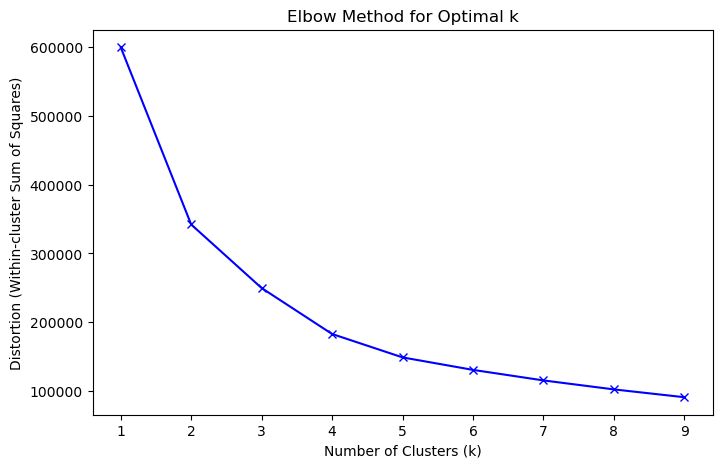

In [96]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [97]:
# Based on the Elbow Method, select an appropriate value for k (e.g., 3)
k = 3

In [98]:
# Perform K-means clustering with the chosen k
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
sales_data['product_segment'] = kmeans.fit_predict(scaled_data)

In [99]:
# Summary statistics for each cluster
cluster_summary = sales_data.groupby('product_segment')[features].mean().reset_index()

In [100]:
# Define Product Segments
segments = {}
for i in range(k):
    segment = {
        'segment_id': i + 1,
        'characteristics': {
            'unit_price': cluster_summary['unit_price'][i],
            'unit_profit': cluster_summary['unit_profit'][i],
            'quantity': cluster_summary['quantity'][i],
            'revenue': cluster_summary['revenue'][i],
            'profit': cluster_summary['profit'][i],
        }
    }
    segments[f'Segment {i + 1}'] = segment

In [101]:
# Visualize the clustering results (2D PCA plot)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
cluster_data_2d = pca.fit_transform(scaled_data)

In [102]:
# Add PCA components to the sales_data DataFrame
sales_data['pca1'] = cluster_data_2d[:, 0]
sales_data['pca2'] = cluster_data_2d[:, 1]

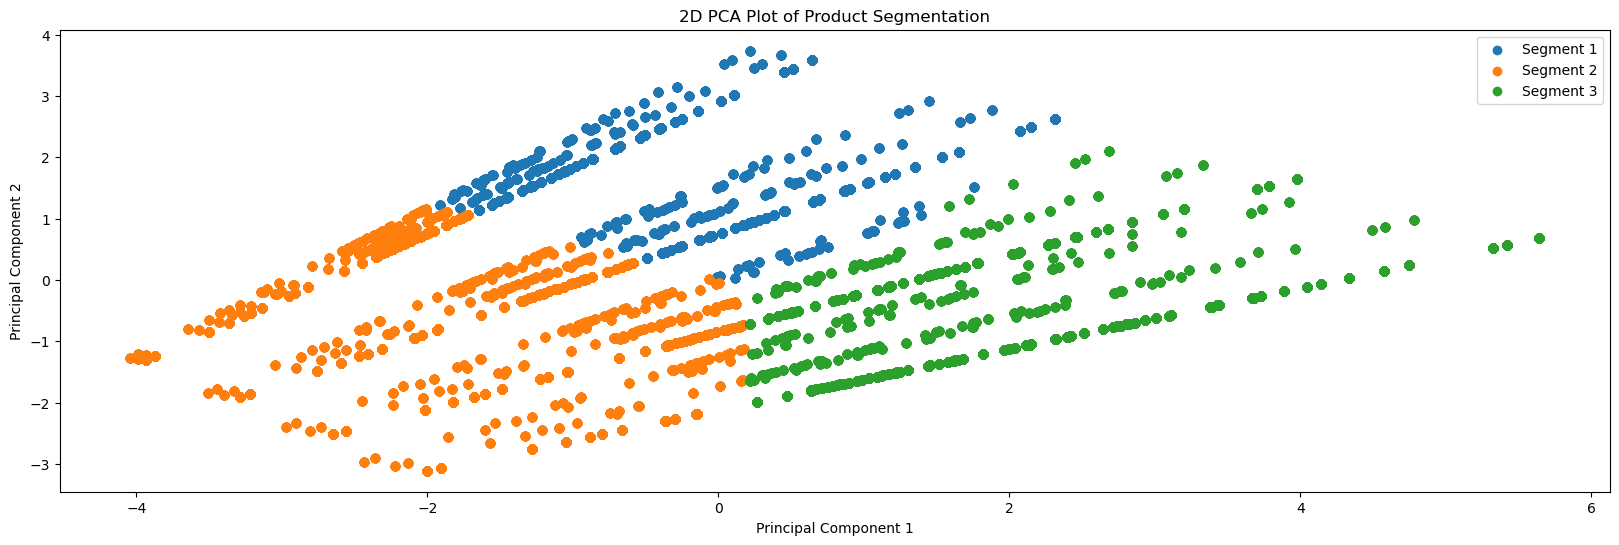

In [103]:
# Visualize the clusters
plt.figure(figsize=(20, 6))
for i in range(k):
    segment_data = sales_data[sales_data['product_segment'] == i]
    plt.scatter(segment_data['pca1'], segment_data['pca2'], label=f'Segment {i + 1}')

plt.title('2D PCA Plot of Product Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [104]:
# Calculate cluster centroids
cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)

In [105]:
# Define the cluster labels you are interested in (e.g., segments 1, 2, and 3)
cluster_labels_of_interest = [1, 2, 3]

In [106]:
# Create a DataFrame to hold cluster centroids and feature names
centroid_df = pd.DataFrame(cluster_centroids, columns=features)

In [107]:
# Display the values for the clusters of interest
for cluster_label in cluster_labels_of_interest:
    print(f"**Segment {cluster_label} Centroid Characteristics**")
    centroid_values = centroid_df.iloc[cluster_label - 1]  # -1 because cluster labels start from 1
    for char, value in centroid_values.items():
        print(f"- {char}: {value:.2f}")
    print("\n")

**Segment 1 Centroid Characteristics**
- unit_price: 37.04
- unit_profit: 15.14
- quantity: 1.54
- revenue: 55.16
- profit: 21.37


**Segment 2 Centroid Characteristics**
- unit_price: 24.50
- unit_profit: 9.19
- quantity: 2.13
- revenue: 49.07
- profit: 17.40


**Segment 3 Centroid Characteristics**
- unit_price: 34.10
- unit_profit: 13.63
- quantity: 3.61
- revenue: 120.15
- profit: 46.65


